# Task 1 - Data Analysis and Preprocessing

### Load and Explore the data
- Import liberaries
- Load datasets
- Understand the feature `Fraud_data`, `ipaddress_to_country` and `creditcard`

In [1]:
import os
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

current_dir = os.getcwd()
# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
from scripts.data_preprocessor import DataPreprocessor
from scripts.Data_visualizer import  DataVisualizer

In [3]:
fraud_file_path = "../data/Fraud_Data.csv"
ipaddress_file_path = "../data/IpAddress_to_Country.csv"

In [4]:
fraud_data =pd.read_csv("../data/Fraud_Data.csv")
ipaddress_df = pd.read_csv("../data/IpAddress_to_Country.csv")
fraud_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [5]:
ipaddress_df

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [15]:

import ipaddress
# Function to convert integer to IPv4 address
def int_to_ip(ip_int):
    return str(ipaddress.IPv4Address(int(ip_int)))

# Apply the function to both lower and upper bound IP address columns
ipaddress_df['lower_bound_ip_address'] = ipaddress_df['lower_bound_ip_address'].apply(int_to_ip)
ipaddress_df['upper_bound_ip_address'] = ipaddress_df['upper_bound_ip_address'].apply(int_to_ip)

In [16]:
ipaddress_df[ipaddress_df['country']=="Ethiopia"]

,lower_bound_ip_address,upper_bound_ip_address,country
92310,197.154.0.0,197.154.255.255,Ethiopia
92322,197.156.64.0,197.156.127.255,Ethiopia
134372,213.55.64.0,213.55.127.255,Ethiopia


### 1. Handle Missing Values

In [17]:
fraud_data.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

### 2. Data Cleaning

In [18]:
fraud_data.duplicated().sum()

np.int64(0)

In [19]:
ipaddress_df.duplicated().sum()

np.int64(0)

### 3. Exploratory Data Analysis (EDA)

In [6]:
visualizer = DataVisualizer(fraud_data)

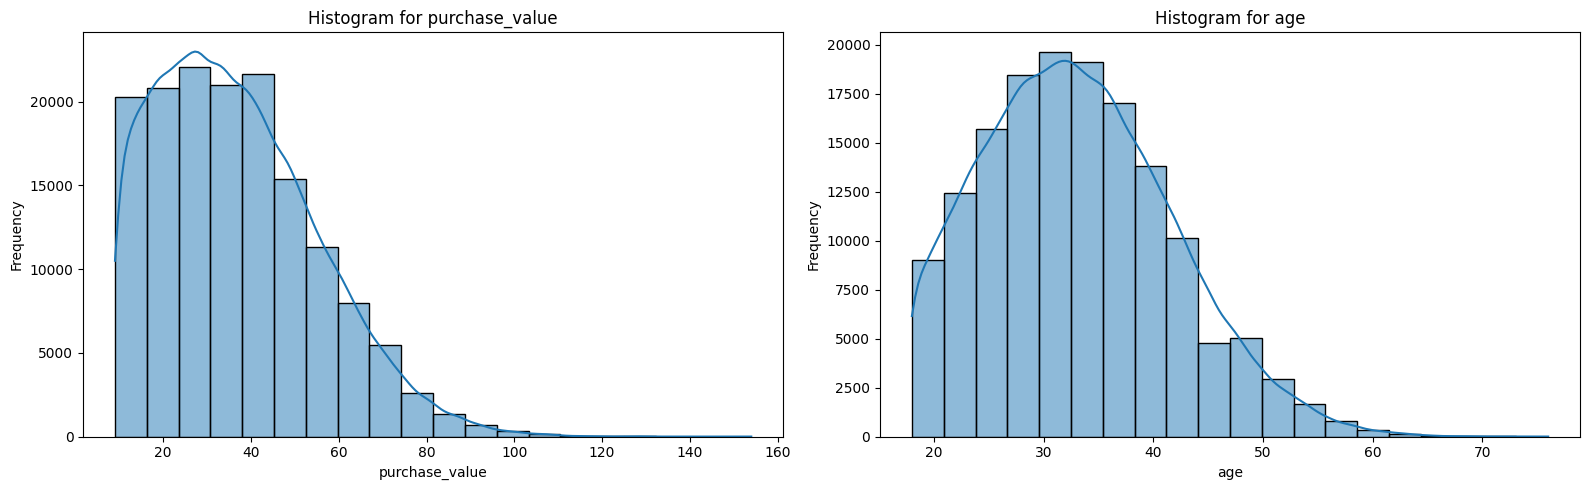

INFO:root:Histograms plotted successfully!


In [8]:
numerical_features = ['purchase_value','age']

visualizer.plot_histogram(numerical_features)

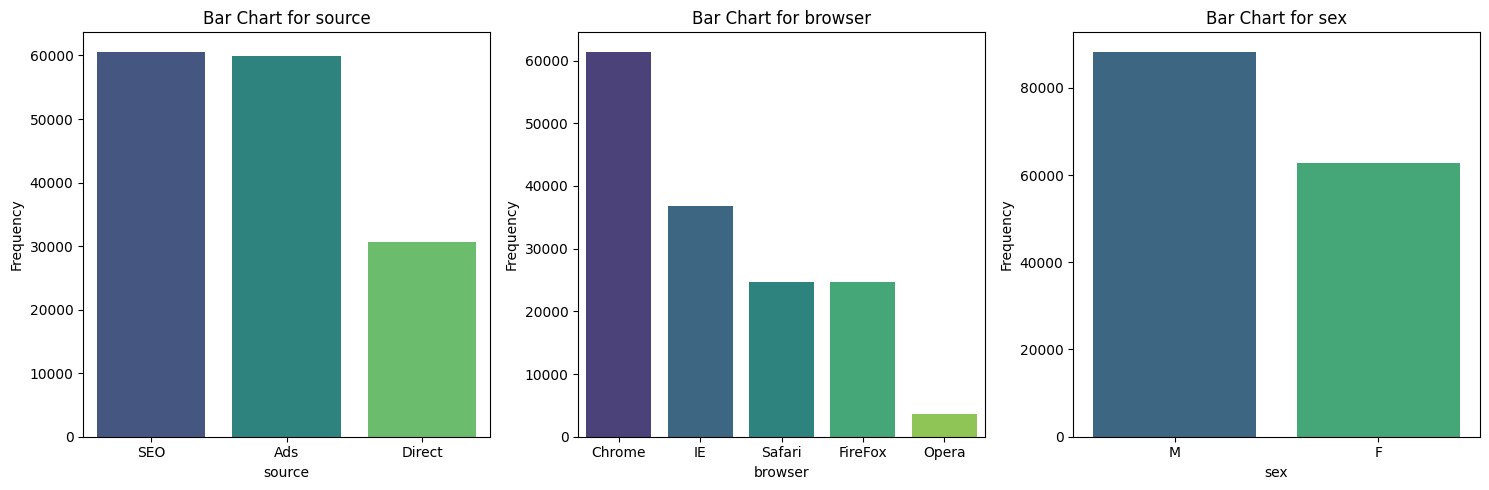

INFO:root:Bar charts plotted successfully!


In [9]:
catagorical_features =['source', 'browser','sex']

visualizer.plot_bar_chart(catagorical_features)

### Bivariate analysis

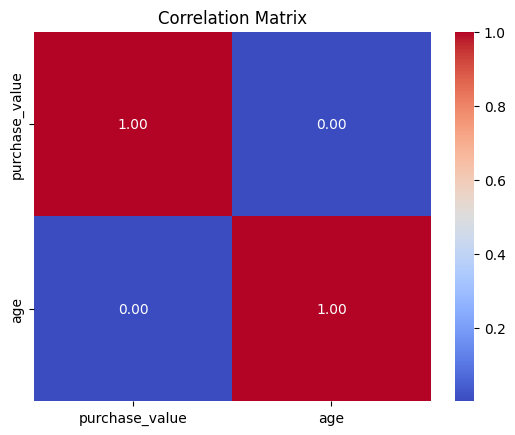

INFO:root:Correlation matrix plotted successfully!


In [10]:
corr = fraud_data.columns
visualizer.plot_correlation_matrix(numerical_features)

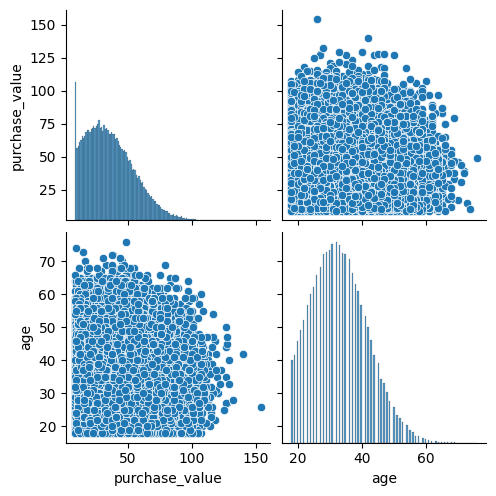

INFO:root:Scatter matrix plotted successfully!


In [11]:
visualizer.plot_scatter_matrix(numerical_features)

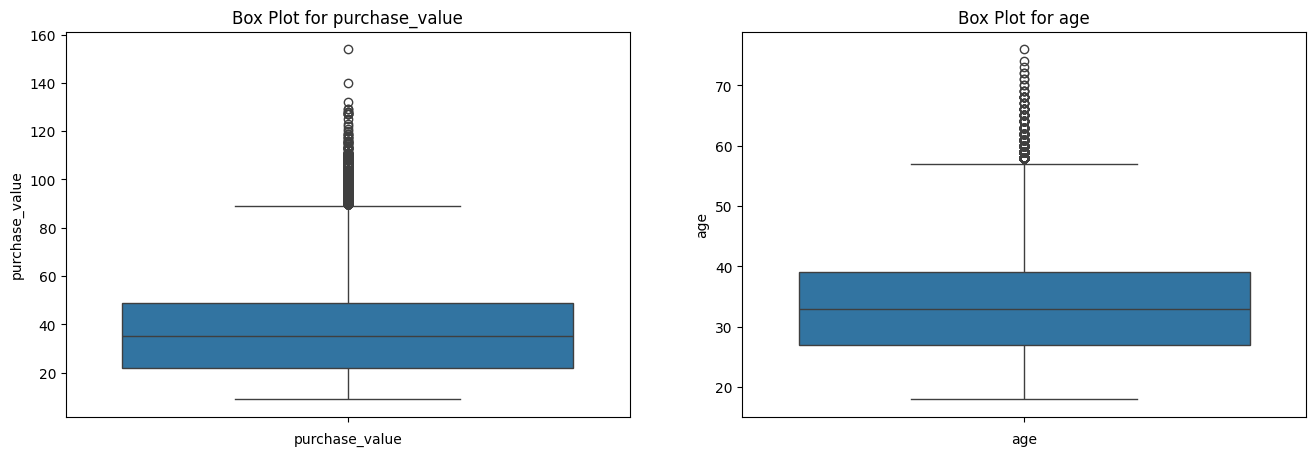

In [12]:
visualizer.plot_box_plot(numerical_features)

### 4. Merge Datasets for Geolocation Analysis

### 5. Feature Engineering

### 6. Normalization and Scaling

### 7. Encode Categorical Features